In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

## Metrics
from sklearn import metrics

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler




## Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

df=pd.read_csv(r"C:\Users\Administrator\Documents\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [8]:
df.head(20).style.background_gradient(cmap="Blues")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [9]:
c=pd.DataFrame(df["Embarked"].unique())
c

,0
0,S
1,C
2,Q
3,NaN


In [10]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
def bar_chart(feature):
    survived=df[df["Survived"]==1][feature].value_counts()
    dead=df[df["Survived"]==0][feature].value_counts()
    d=pd.DataFrame([survived,dead])
    d.index=["Survived","Dead"]
    d.plot(kind="bar",stacked=True,figsize=(10,5))



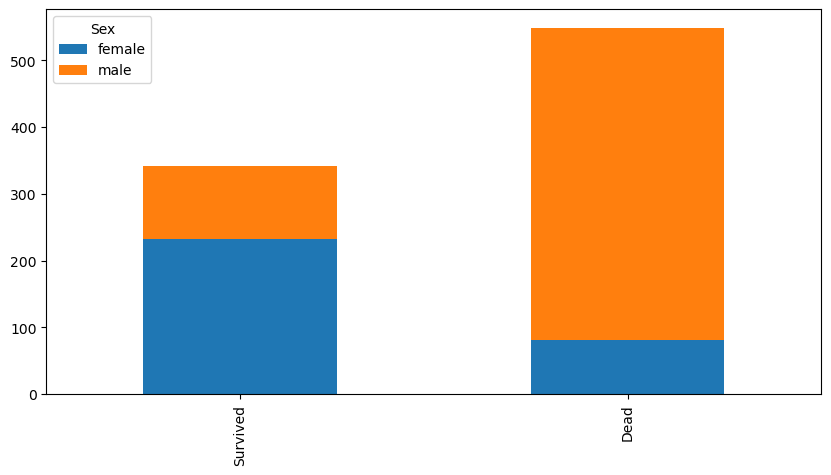

In [14]:
bar_chart("Sex")

<Axes: xlabel='Sex', ylabel='count'>

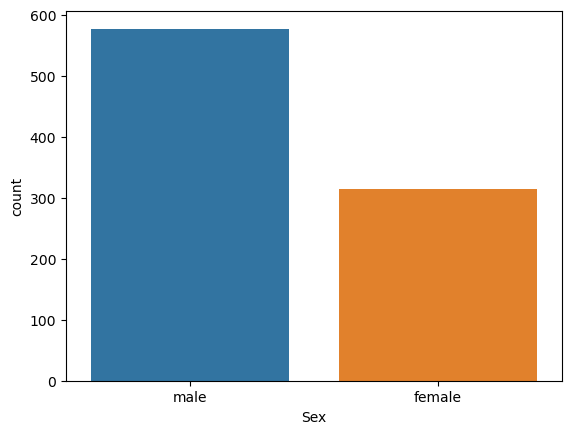

In [15]:
sns.countplot(x="Sex",data=df)

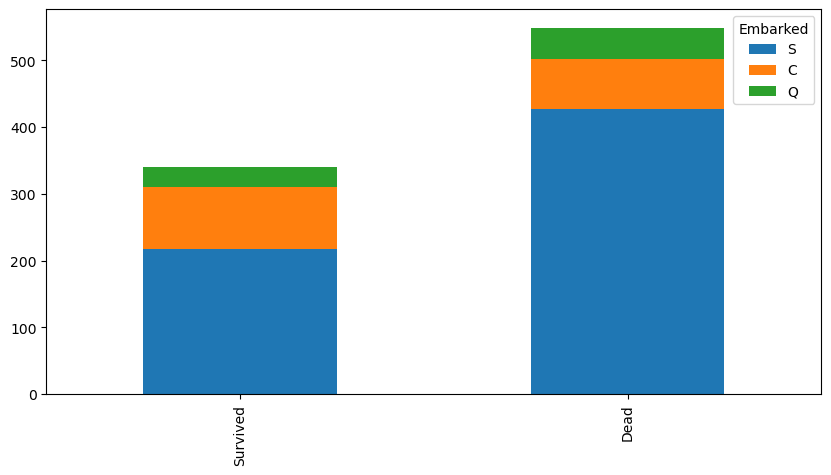

In [16]:
bar_chart("Embarked")

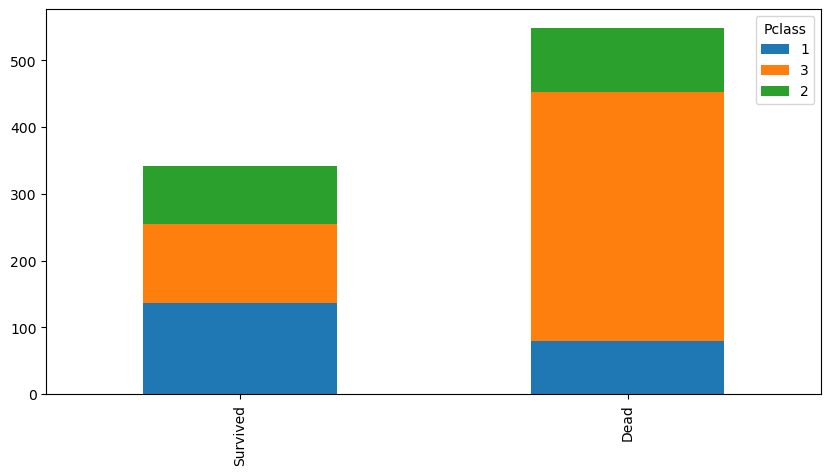

In [17]:
bar_chart("Pclass")

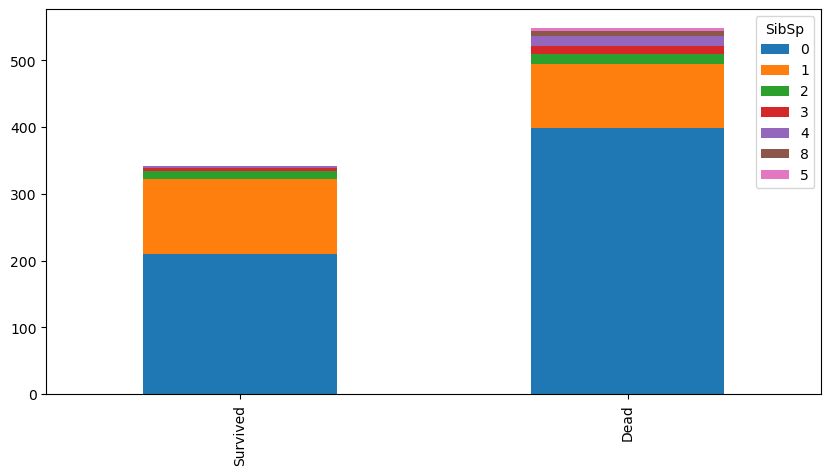

In [18]:
bar_chart("SibSp")

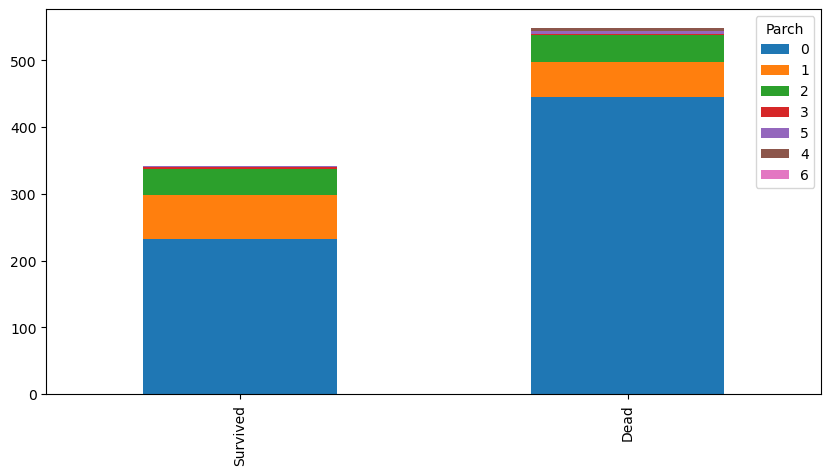

In [19]:
bar_chart("Parch")

Text(0, 0.5, 'Numbers')

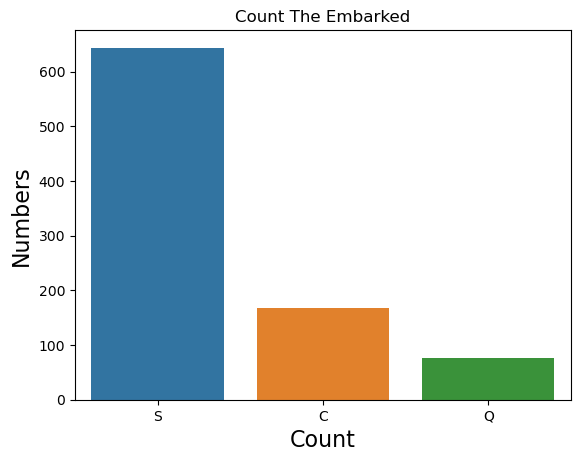

In [20]:
sns.countplot(x="Embarked",data=df)
plt.title("Count The Embarked")
plt.xlabel("Count",fontsize=16,c="k")
plt.ylabel("Numbers",fontsize=16,c="k")


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

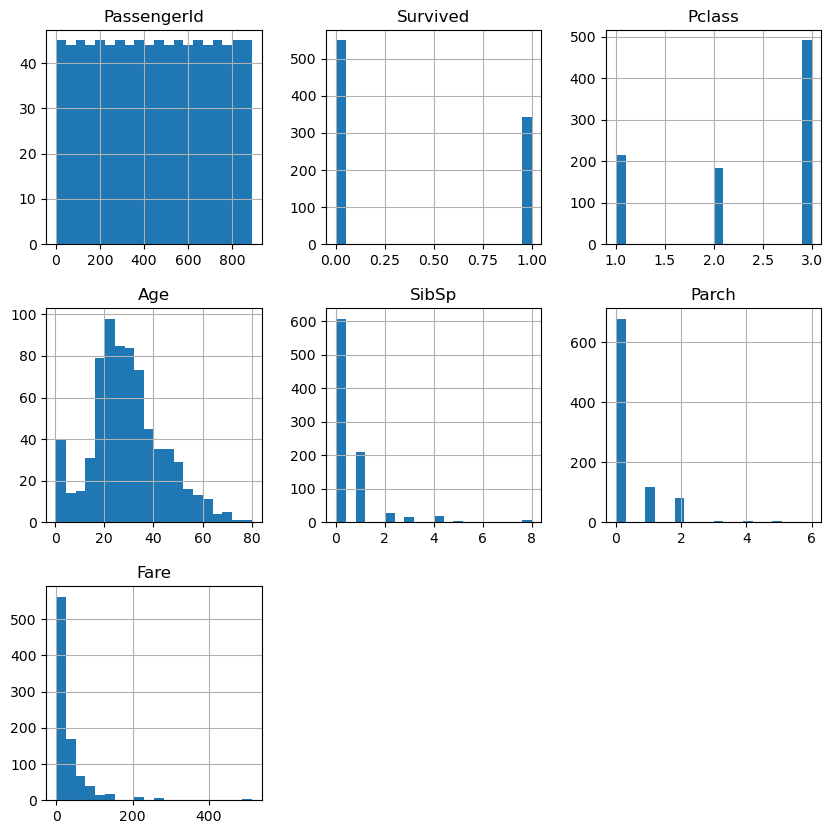

In [21]:
df.hist(bins=20,figsize=(10,10))

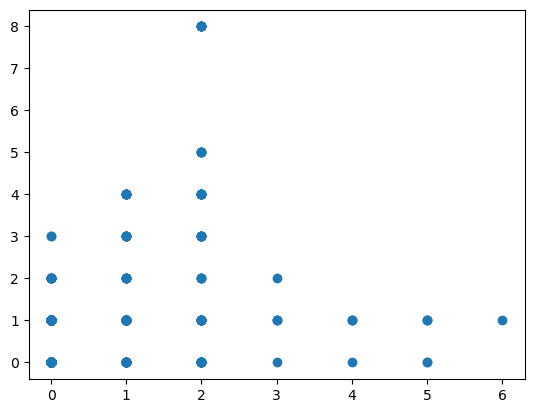

In [22]:
plt.scatter(df["Parch"],df["SibSp"])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


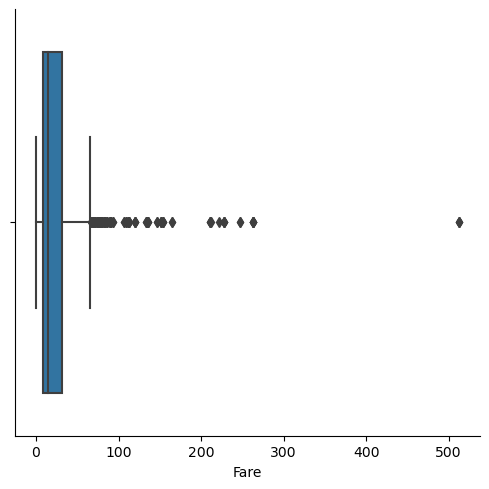

In [23]:
sns.catplot(x="Fare",data=df,kind="box")

<Axes: >

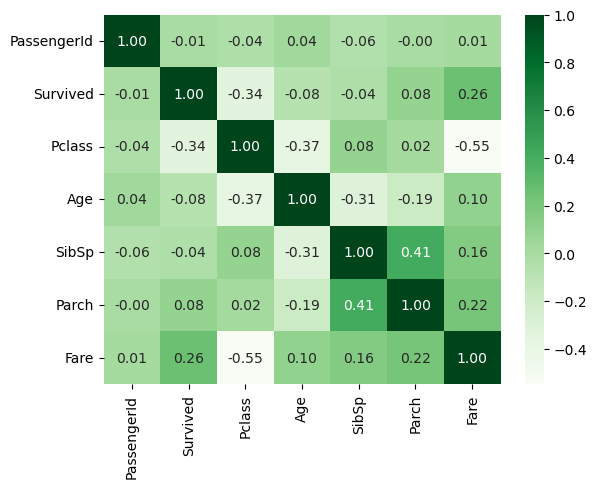

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="Greens")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\1608730871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"],color="b")


<Axes: xlabel='Fare', ylabel='Density'>

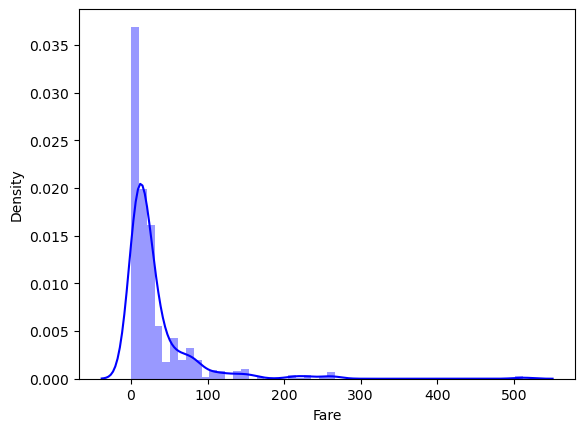

In [25]:
sns.distplot(df["Fare"],color="b")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\1198906838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"],color="g")


<Axes: xlabel='Fare', ylabel='Density'>

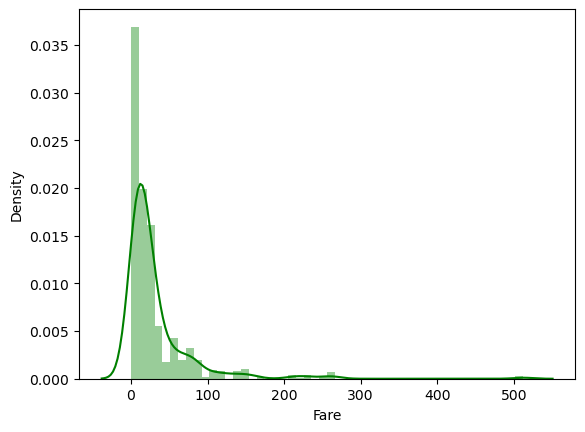

In [26]:
sns.distplot(df["Fare"],color="g")

(array([0.63075196, 0.82154882, 0.89674523, 0.94051627, 0.95735129,
        0.97530864, 0.97755331, 0.97755331, 0.98765432, 0.98989899,
        0.996633  , 0.996633  , 0.996633  , 0.996633  , 0.996633  ,
        0.996633  , 0.996633  , 0.996633  , 0.996633  , 1.        ]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

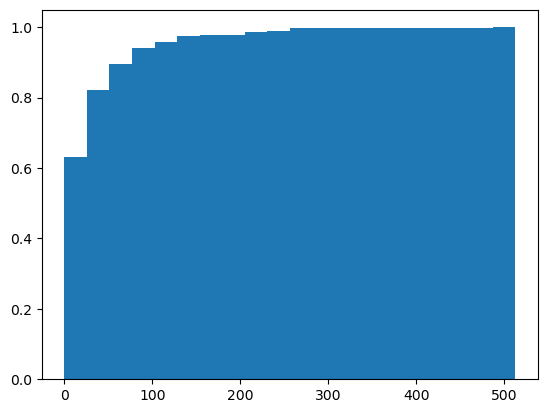

In [27]:
plt.hist(df["Fare"],density=True,cumulative=True,bins=20)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


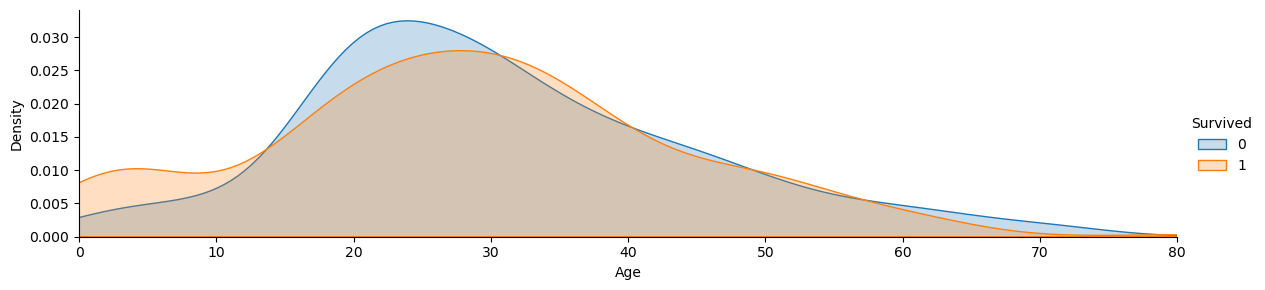

In [28]:

facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


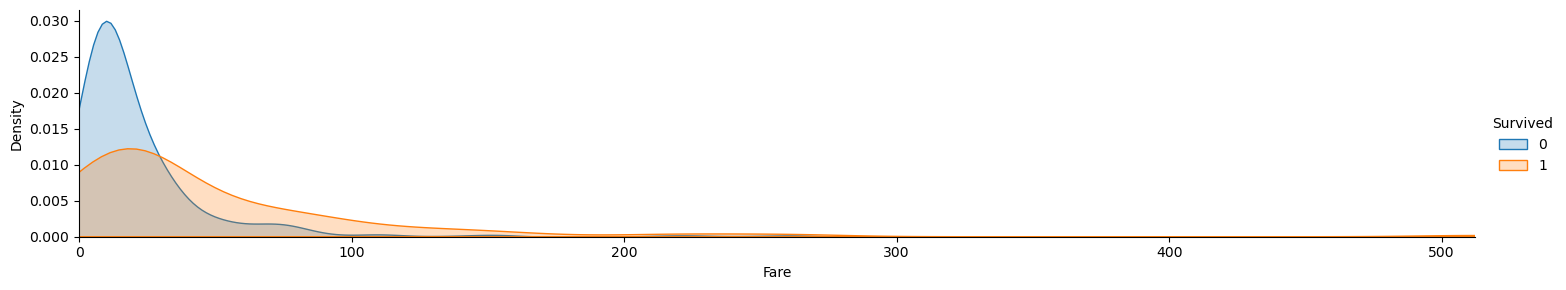

In [29]:
facet=sns.FacetGrid(df,hue="Survived",aspect=5)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,df["Fare"].max()))
facet.add_legend()
plt.show()


In [30]:
df_data=[df]
for dataset in df_data:
    dataset["title"]=dataset["Name"].str.extract("([A-Za-z]+)\.",expand=False)

In [31]:
df["title"].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [32]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Major":3,"Col":3,
               "Countess":3,"Capt":3,"Ms":3,"Sir":3
               ,"Lady":3,"Mme":3,"Don":3,"Jonkheer":3}
for dataset in df_data:
    dataset["title"]=dataset["title"].map(title_mapping)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
df=df.drop(["Name","Cabin","Ticket"],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [35]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [36]:
#transform categ data by labelencoder to numeric data
Encoder=LabelEncoder()
df["Sex"]=Encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [37]:
Encoder=LabelEncoder()
df["Embarked"]=Encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [38]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.2500,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,3
887,888,1,1,0,19.0,0,0,30.0000,2,1
888,889,0,3,0,NaN,1,2,23.4500,2,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


In [39]:
imputer=SimpleImputer(strategy="median")
imputed_df=imputer.fit_transform(df)
imputed_df=pd.DataFrame(imputed_df,columns=df.columns)
imputed_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0,3.0
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,1.0
888,889.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500,2.0,1.0
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0


In [40]:
imputed_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
title          0
dtype: int64

In [41]:
imputed_df.shape

(891, 10)

In [42]:
x=imputed_df.drop(["Survived"],axis=1)
y=imputed_df["Survived"]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,2.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0
...,...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0,3.0
887,888.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,1.0
888,889.0,3.0,0.0,28.0,1.0,2.0,23.4500,2.0,1.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0


In [43]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (757, 9)
x_test shape (134, 9)
y_train shape (757,)
y_test shape (134,)


In [45]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title'],
      dtype='object')

In [46]:
###KNN
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=7)
clf1.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [47]:
clf1.score(x_train,y_train)

0.7186261558784677

In [48]:
y_pred1 = clf1.predict(x_test)
y_pred1

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")

accuracy: 0.664179104477612
precision: 0.6774193548387096
recall: 0.375


In [50]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred1)
print(cm)


[[68 10]
 [35 21]]


<Axes: >

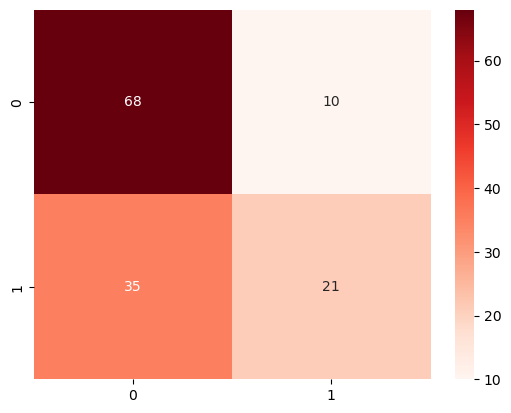

In [51]:
sns.heatmap(cm,annot=True,cmap="Reds")

In [52]:
###RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=6,max_features=4)
clf2.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10,
                       random_state=0)

In [53]:
clf2.score(x_train,y_train)

0.8903566710700133

In [54]:
y_pred2=clf2.predict(x_test)
y_pred2

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.])

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred2)
precision=precision_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")


accuracy: 0.835820895522388
precision: 0.84
recall: 0.75


In [56]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred2)
print(cm)


[[70  8]
 [14 42]]


<Axes: >

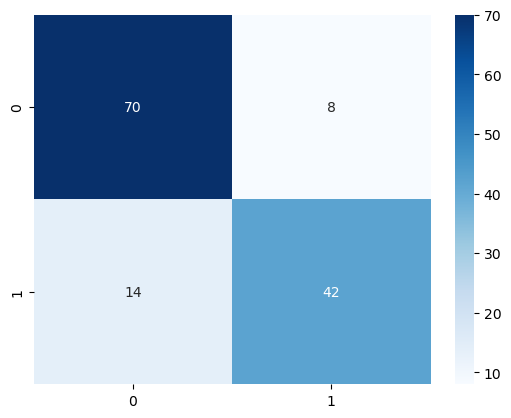

In [57]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [58]:
###DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clfc=DecisionTreeClassifier(random_state=0,max_depth=10,max_features=3)
clfc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10, max_features=3, random_state=0)

In [59]:
clfc.score(x_train,y_train)

0.904887714663144

In [60]:
y_pred3=clfc.predict(x_test)
y_pred3

array([1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.])

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred3)
precision=precision_score(y_test,y_pred3)
recall=recall_score(y_test,y_pred3)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")



accuracy: 0.8283582089552238
precision: 0.8367346938775511
recall: 0.7321428571428571


In [62]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred3)
print(cm)


[[70  8]
 [15 41]]


<Axes: >

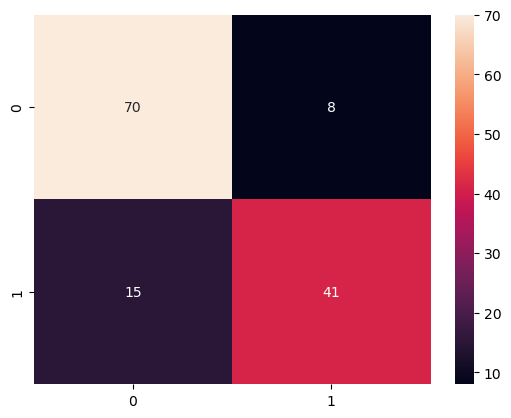

In [63]:
sns.heatmap(cm,annot=True)

In [64]:
###Naive Bayes
from sklearn.naive_bayes import GaussianNB
clfx=GaussianNB()
clfx.fit(x_train,y_train)
clfx.score(x_train,y_train)

0.8110964332892999

In [65]:
y_pred4=clfx.predict(x_test)
y_pred4

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

In [66]:
from sklearn.metrics import accuracy_score,accuracy_score,recall_score
accuracy=accuracy_score(y_test,y_pred4)
precision=precision_score(y_test,y_pred4)
recall=recall_score(y_test,y_pred4)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")






accuracy: 0.7761194029850746
precision: 0.7096774193548387
recall: 0.7857142857142857


In [67]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred4)
print(cm)


[[60 18]
 [12 44]]


<Axes: >

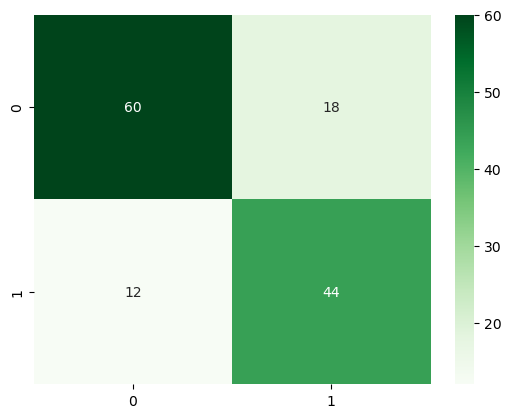

In [68]:
sns.heatmap(cm,annot=True,cmap="Greens")

In [69]:
# svm
clf5=SVC(kernel="rbf",C=1.0)
clf5.fit(x_train,y_train)


SVC()

In [70]:
clf5.score(x_train,y_train)

0.6605019815059445

In [71]:
y_pred5=clfx.predict(x_test)
y_pred5

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

In [72]:
from sklearn.metrics import accuracy_score,accuracy_score,recall_score
accuracy=accuracy_score(y_test,y_pred5)
precision=precision_score(y_test,y_pred5)
recall=recall_score(y_test,y_pred5)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")


accuracy: 0.7761194029850746
precision: 0.7096774193548387
recall: 0.7857142857142857


In [73]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred5)
print(cm)


[[60 18]
 [12 44]]


<Axes: >

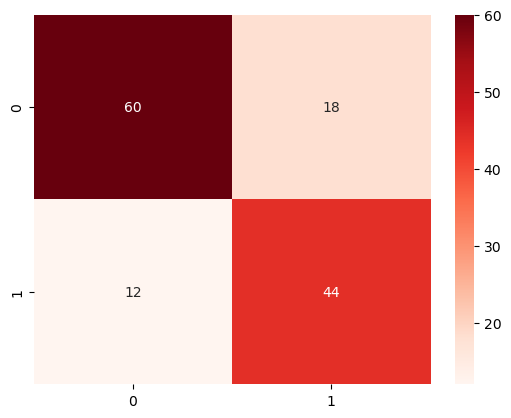

In [74]:
sns.heatmap(cm,annot=True,cmap="Reds")

In [75]:
# TO set data in range between 0:1
Scaler=StandardScaler()
imputed_df=Scaler.fit_transform(imputed_df)
imputed_df

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.50244517,
         0.58111394, -0.73374551],
       [-1.72622007,  1.2669898 , -1.56610693, ...,  0.78684529,
        -1.93846038,  1.33186981],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.48885426,
         0.58111394,  0.29906215],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ..., -0.17626324,
         0.58111394,  0.29906215],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.04438104,
        -1.93846038, -0.73374551],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.49237783,
        -0.67867322, -0.73374551]])

In [76]:
df=pd.DataFrame(imputed_df,columns=df.columns)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,-1.730108,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114,-0.733746
1,-1.726220,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460,1.331870
2,-1.722332,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114,0.299062
3,-1.718444,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114,1.331870
4,-1.714556,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114,-0.733746
...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114,2.364677
887,1.718444,1.266990,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114,0.299062
888,1.722332,-0.789272,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114,0.299062
889,1.726220,1.266990,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460,-0.733746


In [77]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,-1.730108,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114,-0.733746
1,-1.726220,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460,1.331870
2,-1.722332,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114,0.299062
3,-1.718444,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114,1.331870
4,-1.714556,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114,-0.733746
...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114,2.364677
887,1.718444,1.266990,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114,0.299062
888,1.722332,-0.789272,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114,0.299062
889,1.726220,1.266990,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460,-0.733746


In [78]:
##K_means
from sklearn.cluster import KMeans
k=3
kmeans=KMeans(n_clusters=k,random_state=42,init='k-means++')
df["cluster"]=kmeans.fit_predict(df)
df["cluster"]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    0
889    1
890    1
Name: cluster, Length: 891, dtype: int32

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

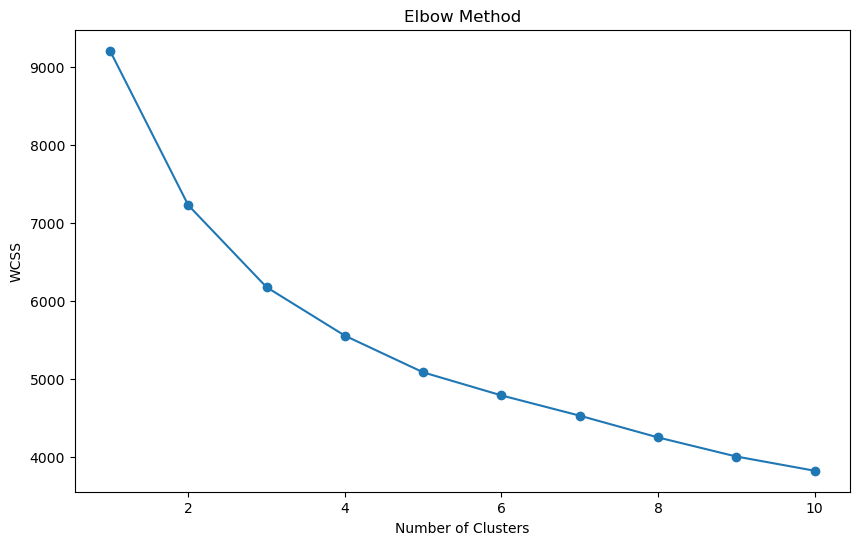

In [79]:
wcss = []  # قائمة لتخزين مجموع مربعات الخطأ لكل قيمة k

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
## Ann
from sklearn.neural_network import MLPClassifier 
NN=MLPClassifier(hidden_layer_sizes=1,activation='relu',learning_rate="constant")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=4)
NN.fit(x_train,y_train)
print(NN.coefs_)
y_pred1=NN.predict(x_test)
accuracy=accuracy_score(y_test,y_pred1)*100
conf_mat=confusion_matrix(y_test,y_pred1)
print("accuracy for NN",accuracy)
print("confusion matrix")
print(conf_mat)


[array([[-9.67550641e-02],
       [ 1.37506695e-01],
       [ 1.67599058e-19],
       [-6.81514465e-02],
       [-1.29842752e-13],
       [-7.17212320e-02],
       [-1.11935201e-01],
       [-2.25345267e-01],
       [ 8.62299278e-19]]), array([[0.99447904]])]
accuracy for NN 66.4179104477612
confusion matrix
[[178   0]
 [ 90   0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
## SMOTE DATA
from imblearn.over_sampling import SMOTE

In [82]:
smote=SMOTE()
X_resampled,Y_resampled=smote.fit_resample(x,y)
X_resampled

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1.000000,3.000000,1.0,22.000000,1.000000,0.000000,7.250000,2.000000,0.000000
1,2.000000,1.000000,0.0,38.000000,1.000000,0.000000,71.283300,0.000000,2.000000
2,3.000000,3.000000,0.0,26.000000,0.000000,0.000000,7.925000,2.000000,1.000000
3,4.000000,1.000000,0.0,35.000000,1.000000,0.000000,53.100000,2.000000,2.000000
4,5.000000,3.000000,1.0,35.000000,0.000000,0.000000,8.050000,2.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1093,599.808233,2.000000,0.0,26.595883,0.234019,0.468039,35.007700,1.531961,1.234019
1094,712.142280,1.000000,0.0,22.999816,0.000000,0.000000,160.089502,2.000000,1.000000
1095,619.637273,1.000000,1.0,60.333742,0.000000,0.000000,28.492254,1.125944,0.000000
1096,632.278985,1.934453,1.0,35.458828,0.532773,0.000000,54.395820,2.000000,0.000000


In [83]:
Y_resampled

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1093    1.0
1094    1.0
1095    1.0
1096    1.0
1097    1.0
Name: Survived, Length: 1098, dtype: float64

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,test_size=0.15,shuffle=True,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (933, 9)
x_test shape (165, 9)
y_train shape (933,)
y_test shape (165,)


In [85]:
# svm after embalanced
clf1=SVC(kernel="rbf",C=1.0)
clf1.fit(x_train,y_train)


SVC()

In [86]:
clf1.score(x_train,y_train)

0.6109324758842444

In [87]:
y_pred1=clfx.predict(x_test)
y_pred1

array([1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [88]:
from sklearn.metrics import accuracy_score,accuracy_score,recall_score
accuracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")


accuracy: 0.8181818181818182
precision: 0.8441558441558441
recall: 0.7831325301204819


In [89]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred1)
print(cm)


[[70 12]
 [18 65]]


In [90]:
## DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier(random_state=0,max_depth=10,max_features=3)
clf2.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10, max_features=3, random_state=0)

In [91]:
clf2.score(x_train,y_train)

0.9228295819935691

In [92]:
y_pred2=clfc.predict(x_test)
y_pred2

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.])

In [93]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred2)
precision=precision_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")


accuracy: 0.8545454545454545
precision: 0.9682539682539683
recall: 0.7349397590361446


In [94]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred2)
print(cm)


[[80  2]
 [22 61]]


In [95]:
## knn after smote
from sklearn.neighbors import KNeighborsClassifier
clf3=KNeighborsClassifier(n_neighbors=7)
clf3.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [96]:
clf3.score(x_train,y_train)

0.7416934619506966

In [97]:
y_pred3=clfc.predict(x_test)
y_pred3

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.])

In [98]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred3)
precision=precision_score(y_test,y_pred3)
recall=recall_score(y_test,y_pred3)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")


accuracy: 0.8545454545454545
precision: 0.9682539682539683
recall: 0.7349397590361446


In [99]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred3)
print(cm)


[[80  2]
 [22 61]]


In [100]:
## Ann after SMOTE
from sklearn.neural_network import MLPClassifier 
NN=MLPClassifier(hidden_layer_sizes=1,activation='relu',learning_rate="constant")
x_train,x_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,test_size=0.3 ,random_state=4)
NN.fit(x_train,y_train)
print(NN.coefs_)
y_pred1=NN.predict(x_test)
accuracy=accuracy_score(y_test,y_pred1)*100
conf_mat=confusion_matrix(y_test,y_pred1)
print("accuracy for NN",accuracy)
print("confusion matrix")
print(conf_mat)


[array([[ 0.57557857],
       [-0.50261735],
       [ 0.10896454],
       [ 0.17362368],
       [ 0.00248576],
       [-0.39249785],
       [-0.39708578],
       [-0.63684992],
       [ 0.24876518]]), array([[0.00187218]])]
accuracy for NN 47.57575757575758
confusion matrix
[[100  73]
 [100  57]]
